1. 每年计一次复利的年利率为 12%，请计算与之等价的每季度计一次复利的年利率和连续复利年利率， 并计算 10000 元现值在 1 年之后的终值。

设每年计息一次的年利率为$r_{1}$，每季度计息一次的年利率为$r_{4}$，连续复利年利率为$r$，终值为$FV$，现值为$PV$

$r_{4} = (1+\frac{r_{1}}{4})^{4} -1= 0.12550881 = 12.550881\% $

$r = e^{r_{1}} - 1 = 0.12749685157937574 = 12.749685157937574\%$

$FV = PV(1+r_{1})^{n} = 10000*(1+0.12)^{1} = 11200$

In [2]:
from math import e
r1,m,n = 0.12,4,1
r4 = (1+r1/m)**m -1
r = e**(r1) - 1
fv = 10000*(1+r1)**n
print(fv)

11200.000000000002


2. 某笔存款的连续复利年利率为 12%，但实际上利息是每月支付一次。请问 3万元存款每月能得到多少利息?

设连续复利利率为r，每月计息利率为$r_{12}$，终值为$FV$，现值为$PV$，每月支付的利息为$pmt_{i}$，假设存款本息之和逐月摊销支付，存款期限为一年。

首先求出本息和的终值：$FV = PV*e^{r} = 33824.9055$

此时再算出一年计息12次时的利息：$r_{12} = m (e^{\frac{r}{m}}) - 1 = 12(e^{\frac{0.12}{12}}) - 1 = 0.12749685 = 12.749685\%$

最后，按照$r_{12}$将$FV$摊销到12个月,即在下式解出$pmt_{i}$： $\Sigma_{t=1}^{n} pmt_{i}(1+r_{n})^{t} = FV$,

可得，$pmt_{i} = \frac{FV}{\Sigma_{t=1}^{n} (1+r_{12})^{t}} = \frac{33824.9055}{\Sigma_{t=1}^{12} (1.12749)^{t}}$

解得$pmt_{i} = 1339.01777$

In [4]:
from math import e
import numpy as np
r,pv,m = 0.12,30000,12
fv = pv*e**r
r_12 = m*(e**r/m)-1
interest_payment = fv/(sum(np.array(pow(r_12+1,np.array(range(12))))))
print(interest_payment)

1339.0177797922368


3. 回忆课件 FE01 里面案例 1.1B：如果将存款利息改为在未来的 1 年内将获得4%的最低收益保证加上 40%的 S&P500 指数变动幅度，请写出收益的数学表达式以及作图。

设S&P500 指数变动幅度为R，总收益为P

可得总收益$P = max(40\%R, 4\%)$

即:
P =
\begin{cases} 
4\%,  & \text{if }\text{ $R \leq 0.1$} \\
40\%R , & \text{if }\text{ R > 0.1}
\end{cases}

作图过程如下：

<function matplotlib.pyplot.show(close=None, block=None)>

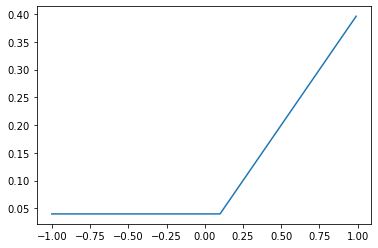

In [1]:
import matplotlib.pyplot as plt
import numpy as np
R = np.arange(-1,1,0.01)
P = np.where(0.4*R<0.04,0.04,0.4*R)
plt.plot(R,P)
plt.show

4. 很多金融文献都采用ln Pt 来表示收益率或增长率（其中Pt 为 t 时刻的变量值），请问这是为什么？但对于日收益率或日增长率，人们常常认为 $ln P_{t}$和$\frac{\Delta P_{t}}{P_{t}}$差不多，你同意吗？

1. 因为价格$P>0$，所以P的分布往往是右偏的，用ln对P做处理可以使得收益率的分布更趋近于高斯分布
2. P在[0,T]时间段的增长率可以用$\Sigma_{t=0}^{T} ln \frac{P_{t+1}}{P_{t}}$表示，可见对数增长率是可以累加的，计算比较方便
3. 考虑外汇交易情景，a货币对b货币的贬值率$ln \frac{P_{a}}{P_{b}}$与b货币对a货币的贬值率$ln \frac{P_{b}}{P_{a}}$正好互为相反数，相比于百分比增长率，可以更好展示二者的相对升贬值关系

同意，因为对于日增长率这种分布比较集中的数据而言，$P_{t}$与$P_{t+1}$的差额并不大，所以对数处理和百分比处理都不会造成数据出现显著的稀疏化，因此可以二者视为基本等同。